<a href="https://colab.research.google.com/github/himanshuchrist/AI-ML/blob/ML_Lab/Lab7_2348520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#loading data
data=pd.read_csv('/content/drive/MyDrive/employee_data (1) 2.csv')
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [27]:
#finding the null values
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [28]:
#handling the null values
data['filed_complaint'].fillna(0,inplace=True)
data['last_evaluation'].fillna(data['last_evaluation'].mean(),inplace=True)
data['recently_promoted'].fillna(0,inplace=True)
data['satisfaction'].fillna(data['satisfaction'].mode()[0],inplace=True)
data=data.dropna()

In [29]:
#Assigning nominal data numeric values
from sklearn.preprocessing import LabelEncoder
for col in ['department','salary','status']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,2,0.0,0.932868,4,0.0,1,0.829896,1,5.0
1,232,10,0.0,0.718477,3,0.0,1,0.834544,0,2.0
2,184,9,0.0,0.788830,3,0.0,2,0.834988,0,3.0
3,206,9,0.0,0.575688,4,0.0,1,0.424764,0,2.0
4,249,9,0.0,0.845217,3,0.0,1,0.779043,0,3.0


In [30]:
data.describe()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000
mean,201.203159,6.055393,0.145071,0.718503,3.807845,0.021334,1.345460,0.622194,0.236620,3.504155
std,49.930370,3.551463,0.352185,0.164458,1.235721,0.144500,0.624924,0.250476,0.425023,1.473922
min,96.000000,0.000000,0.000000,0.316175,2.000000,0.000000,0.000000,0.040058,0.000000,2.000000
25%,156.000000,2.000000,0.000000,0.577606,3.000000,0.000000,1.000000,0.451782,0.000000,3.000000
50%,200.000000,8.000000,0.000000,0.718477,4.000000,0.000000,1.000000,0.654061,0.000000,3.000000
75%,245.000000,9.000000,0.000000,0.857885,5.000000,0.000000,2.000000,0.825668,0.000000,4.000000
max,310.000000,10.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,1.000000,10.000000


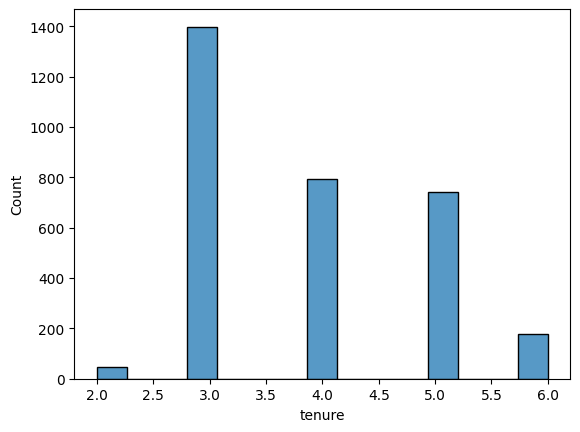

<Axes: xlabel='tenure', ylabel='Count'>

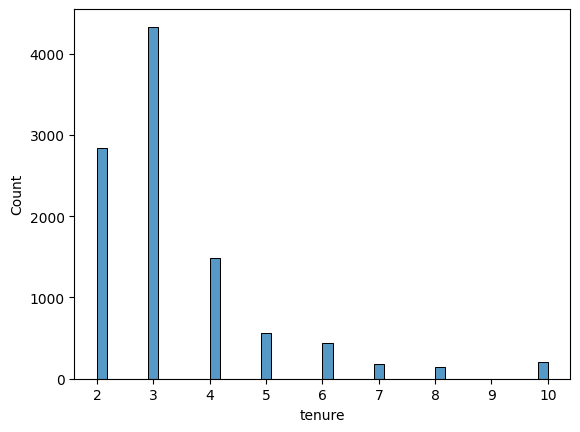

In [31]:
#plotting tenure based on status
import seaborn as sns
left=data[data["status"]==1]
employed=data[data["status"]==0]
sns.histplot(left["tenure"])
plt.show()
sns.histplot(employed["tenure"])

<Axes: xlabel='status', ylabel='satisfaction'>

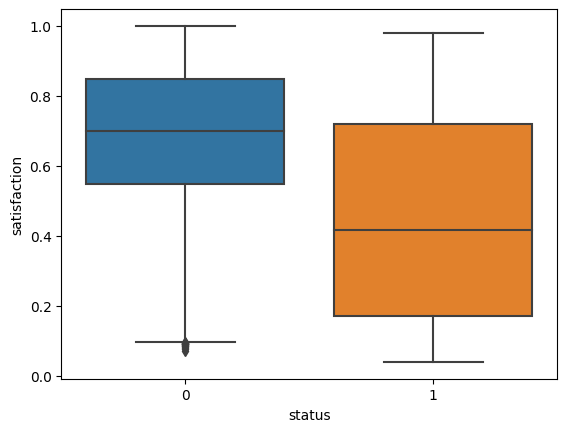

In [32]:
#boxplot for satisfaction score based on status
sns.boxplot(y=data['satisfaction'],x=data['status'])

<Axes: ylabel='status'>

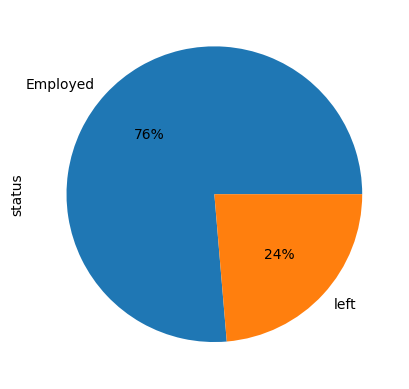

In [33]:
#pie chart showing employed and left ratio
data['status'].value_counts().plot(kind="pie",labels=["Employed","left"],autopct='%1.0f%%')

<Axes: xlabel='satisfaction', ylabel='last_evaluation'>

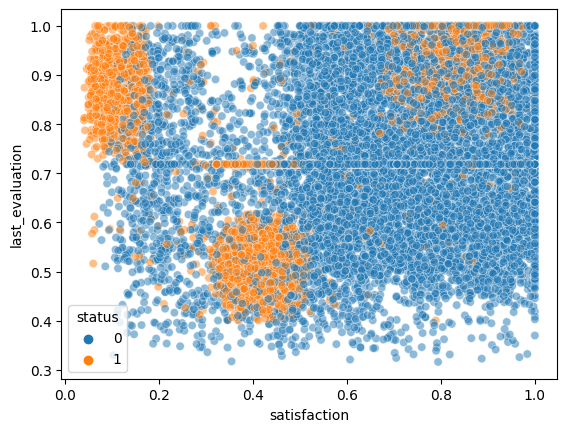

In [34]:
#scatter plot showing satisfaction and last evaluation based on status
sns.scatterplot(x=data['satisfaction'],y=data['last_evaluation'],hue=data['status'],alpha=0.5)

In [35]:
#assigning dependent and independent features
X=data.drop(columns='status',axis=1)
y=data['status']

In [36]:
# Import Library for splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.2)

In [37]:
# Creating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train,y_train)
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
# Predict Accuracy Score
from sklearn.metrics import accuracy_score
y_pred = clf_gini.predict(X_test)
print("Test data accuracy using gini impurity:",accuracy_score(y_true = y_test, y_pred=y_pred))
y_pred = clf_entropy.predict(X_test)
print("Test data accuracy using entropy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Test data accuracy using gini impurity: 0.968188622754491
Test data accuracy using entropy: 0.9625748502994012


<BarContainer object of 9 artists>

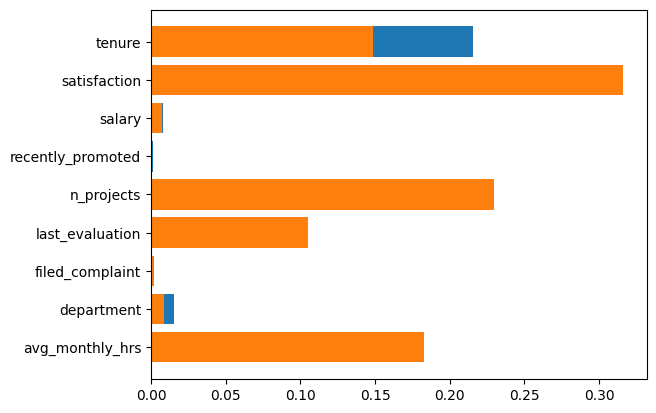

In [39]:
#finding most important features under entropy and gini
plt.barh(X.columns,clf_entropy.feature_importances_)
plt.barh(X.columns,clf_gini.feature_importances_)

In [40]:
#tree depth of entropy and gini
print("entropy tree depth:"+str(clf_entropy.get_depth()))
print("gini tree depth:"+str(clf_gini.get_depth()))

entropy tree depth:29
gini tree depth:21


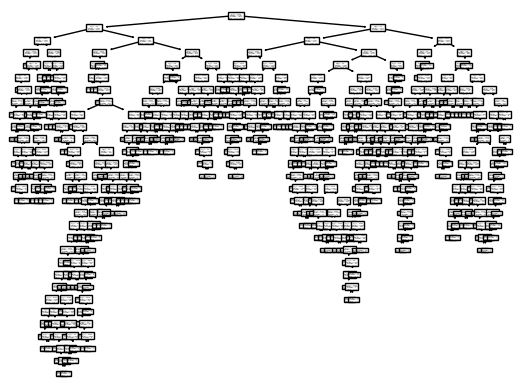

In [41]:
#plotting the tree under entropy
from sklearn import tree
tree.plot_tree(clf_entropy)
plt.show()

In [42]:
#prunning using max leaf nodes,min sample leaf and max depth
X=data.drop(columns=['status','salary','recently_promoted','filed_complaint','department'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.2)
clf = DecisionTreeClassifier(max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred),clf.get_depth())

Test data accuracy: 0.969685628742515 5


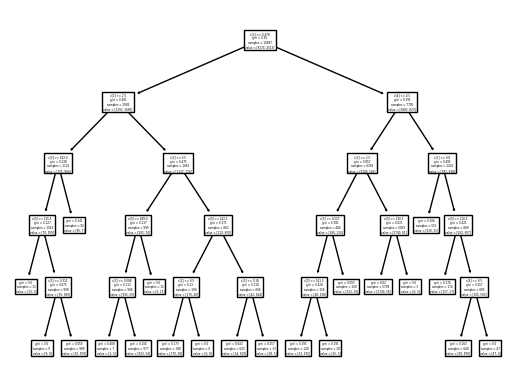

In [43]:
#plotting pruned tree
tree.plot_tree(clf)
plt.show()

In [44]:
#finding the precision,recall and f! score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2024
           1       0.96      0.91      0.94       648

    accuracy                           0.97      2672
   macro avg       0.97      0.95      0.96      2672
weighted avg       0.97      0.97      0.97      2672



In [45]:
#prunning on gini and entropy and finding accuracy
clf_gini = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf_gini.fit(X_train,y_train)
clf_entropy = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf_entropy.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
print("Test data accuracy using gini impurity:",accuracy_score(y_true = y_test, y_pred=y_pred))
y_pred1 = clf_entropy.predict(X_test)
print("Test data accuracy using entropy:",accuracy_score(y_true = y_test, y_pred=y_pred1))

Test data accuracy using gini impurity: 0.969311377245509
Test data accuracy using entropy: 0.9674401197604791


In [46]:
#confusion matrix under gini
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2001,   23],
       [  59,  589]])

In [47]:
#confusion matrix under entropy
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred1)
confusion_matrix1

array([[2001,   23],
       [  64,  584]])

<BarContainer object of 5 artists>

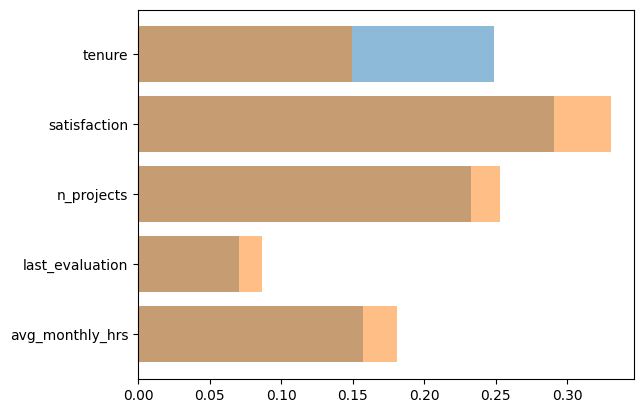

In [48]:
#feature importance under gini and entropy post pruning
plt.barh(X.columns,clf_entropy.feature_importances_,alpha=0.5)
plt.barh(X.columns,clf_gini.feature_importances_,alpha=0.5)